## EDA: Matplotlib and Seaborn ##

In this jupyter notebook we will perform Exploratory Data Analysis (EDA) on categorical, date and numerical columns from the transformed Patents table located in file patent_tr.xlsx. The analysis will be both, univariate and bivariate. The objective is to start answering the initial questions we have previously formulated as well as to find new patterns and existing relationships between variables. For this aim, we will use two different python libraries for data visualization: matplotlib and seaborn.

In [51]:
#First we need to import the necessary libraries

import seaborn as sns  #library for data viz
import matplotlib.pyplot as plt #library for data viz
import pandas as pd #library for data manipulation and transfomation
pd.set_option("display.max_columns", None) #we configure pandas to display all columns from dataframe when needed.
import numpy as np #to perform calculations with numpy numbers. Just in case we need it.
from scipy.stats import linregress #library to perform linear regression
from datetime import datetime #library to work with dates

In [22]:
#Now we need to load the whole dataset. We will start with the products table.

df_pat_tr = pd.read_excel("../1_Data/Data_Transformed/patent_tr.xlsx")
display(df_pat_tr.head())

,Appl_No,Product_No,Appl_Type,Delist_Flag,Patent_Use,Submission_Date,Expiration_Date,Patent_Duration_Years
0,20610,1,Innovator,Not Requested,TREATMENT OF ULCERATIVE COLITIS,NaT,2026-08-24,NaN
1,18613,1,Innovator,Not Requested,TREATMENT OF PATIENTS INFECTED WITH PEDICULUS ...,NaT,2027-02-01,NaN
2,19734,2,Innovator,Not Requested,METHOD FOR TREATING ACUTE ELEVATIONS OF BLOOD ...,2013-06-27,2027-04-18,13.8
3,19734,5,Innovator,Not Requested,METHOD FOR TREATING ACUTE ELEVATIONS OF BLOOD ...,NaT,2027-04-18,NaN
4,20832,7,Innovator,Not Requested,USE AS AN ANTISEPTIC FOR THE PREPARATION OF A ...,NaT,2027-04-25,NaN


In [23]:
df_pat_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Appl_No                16598 non-null  int64         
 1   Product_No             16598 non-null  int64         
 2   Appl_Type              16598 non-null  object        
 3   Delist_Flag            16598 non-null  object        
 4   Patent_Use             16598 non-null  object        
 5   Submission_Date        14555 non-null  datetime64[ns]
 6   Expiration_Date        16598 non-null  datetime64[ns]
 7   Patent_Duration_Years  14555 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [24]:
#First of all let's convert Appl_No and Product_No to string, so we can use them as categorical variables.
df_pat_tr['Appl_No'] = df_pat_tr['Appl_No'].astype(str)
df_pat_tr['Product_No'] = df_pat_tr['Product_No'].astype(str)

In [25]:
df_pat_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Appl_No                16598 non-null  object        
 1   Product_No             16598 non-null  object        
 2   Appl_Type              16598 non-null  object        
 3   Delist_Flag            16598 non-null  object        
 4   Patent_Use             16598 non-null  object        
 5   Submission_Date        14555 non-null  datetime64[ns]
 6   Expiration_Date        16598 non-null  datetime64[ns]
 7   Patent_Duration_Years  14555 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 1.0+ MB


### Univariate analysis of categorical columns ###

In [26]:
#First of all, we will create a dataframe just with categorical columns.

df_pat_tr_cat = df_pat_tr.select_dtypes(include='object') #the function select_dtypes returns a filtered df.
df_pat_tr_cat.head()

,Appl_No,Product_No,Appl_Type,Delist_Flag,Patent_Use
0,20610,1,Innovator,Not Requested,TREATMENT OF ULCERATIVE COLITIS
1,18613,1,Innovator,Not Requested,TREATMENT OF PATIENTS INFECTED WITH PEDICULUS ...
2,19734,2,Innovator,Not Requested,METHOD FOR TREATING ACUTE ELEVATIONS OF BLOOD ...
3,19734,5,Innovator,Not Requested,METHOD FOR TREATING ACUTE ELEVATIONS OF BLOOD ...
4,20832,7,Innovator,Not Requested,USE AS AN ANTISEPTIC FOR THE PREPARATION OF A ...


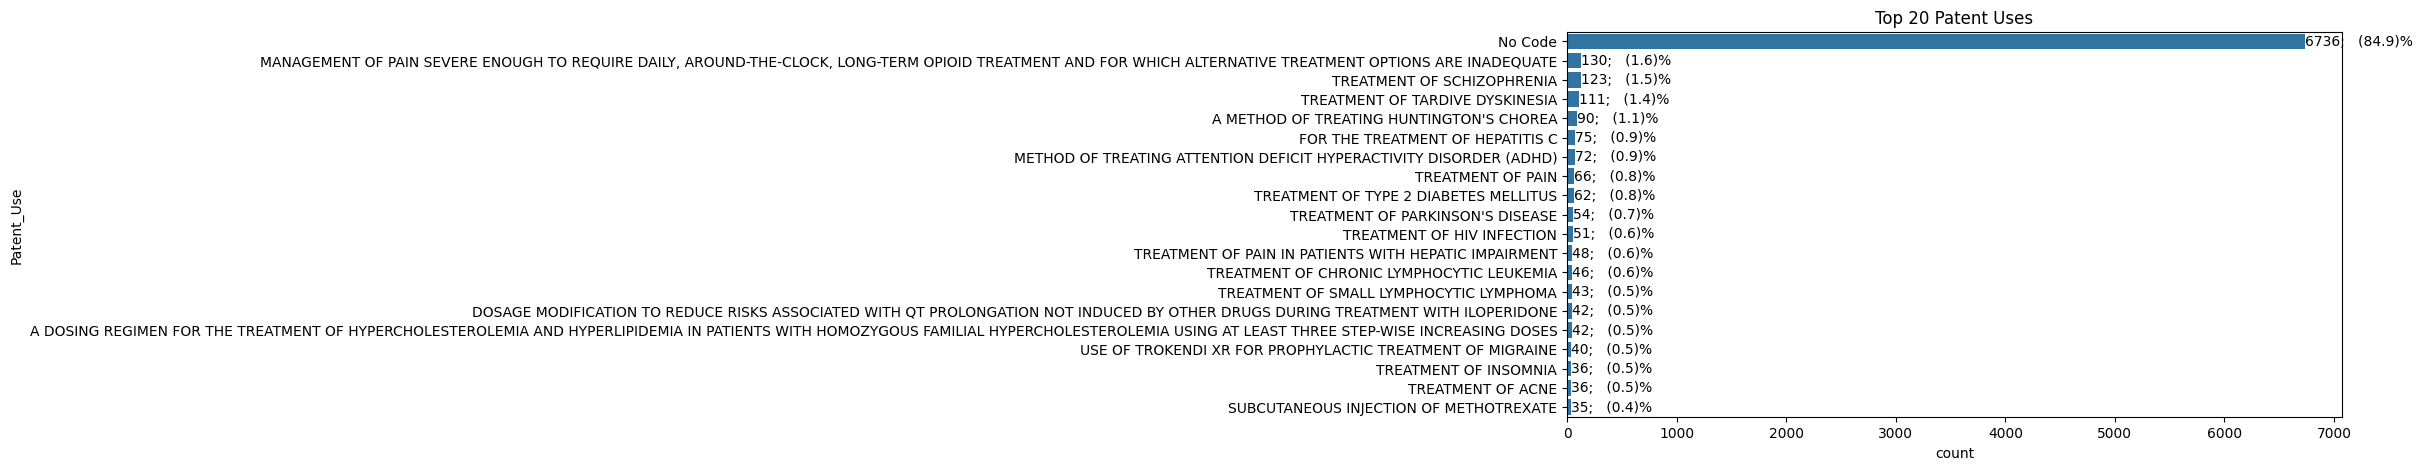

In [27]:
#Univariate analysis of Patent_Use

#First of all, we will extract the top 20 Patent_Use_Code from the dataframe.
order = df_pat_tr_cat['Patent_Use'].value_counts().nlargest(20).index

#We will create a countplot to show the top 10 Patent_Use_Code.
fig, ax = plt.subplots(figsize=(10, 5)) #we create a figure and an axis to plot the data.
sns.countplot(data=df_pat_tr_cat, y='Patent_Use', ax=ax, order=order) #we use seaborn to plot the data.
df = df_pat_tr_cat['Patent_Use'].value_counts().nlargest(20).reset_index(name='Count') #we create a dataframe with the top 10 Patent_Use_Code and their counts.
df['Percentage'] = df['Count'] / df['Count'].sum() * 100 #we calculate the percentage of each category.

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};   ({p:.1f})%" for c,p in zip(df['Count'], df['Percentage']))) #we add the labels to the bars.
ax.set_title('Top 20 Patent Uses') #we set the title of the plot.
plt.show()

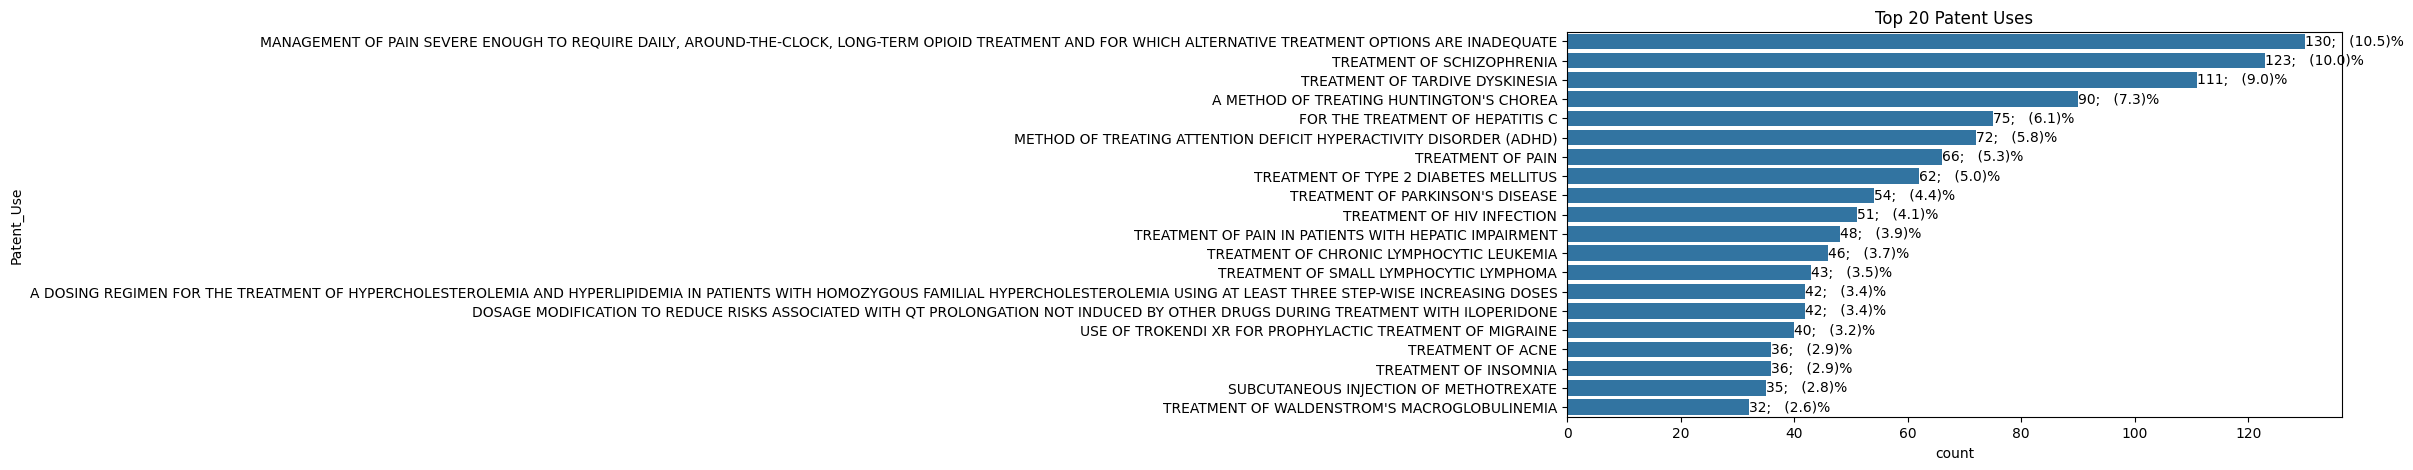

In [28]:
#As we can see in the previous barplot, the most commo category is "No Code". So we will remove it from the dataframe.
df_pat_tr_cat = df_pat_tr_cat[df_pat_tr_cat['Patent_Use'] != 'No Code'] #we filter the dataframe to remove the "No Code" category.
order = df_pat_tr_cat['Patent_Use'].value_counts().nlargest(20).index

#We will create a countplot to show the top 10 Patent_Use_Code.
fig, ax = plt.subplots(figsize=(10, 5)) #we create a figure and an axis to plot the data.
sns.countplot(data=df_pat_tr_cat, y='Patent_Use', ax=ax, order=order) #we use seaborn to plot the data.
df = df_pat_tr_cat['Patent_Use'].value_counts().nlargest(20).reset_index(name='Count') #we create a dataframe with the top 10 Patent_Use_Code and their counts.
df['Percentage'] = df['Count'] / df['Count'].sum() * 100 #we calculate the percentage of each category.

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};   ({p:.1f})%" for c,p in zip(df['Count'], df['Percentage']))) #we add the labels to the bars.
ax.set_title('Top 20 Patent Uses') #we set the title of the plot.
plt.show()

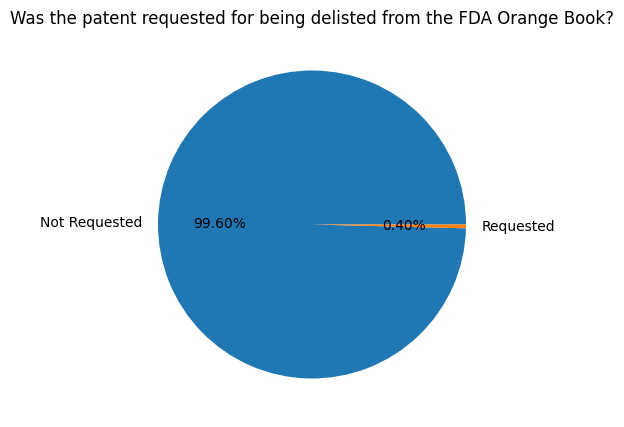

In [29]:
#Univariate analysis for Delist_Flag

data = df_pat_tr_cat['Delist_Flag'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_pat_tr_cat['Delist_Flag'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct="%1.2f%%") #autopct for auto-calculating percentage of each group.
plt.title('Was the patent requested for being delisted from the FDA Orange Book?')
plt.show()

In [30]:
df_pat_tr_cat['Delist_Flag'].value_counts() #we can also check the value counts of the Delist_Flag column.

Delist_Flag
Not Requested    9823
Requested          39
Name: count, dtype: int64

In [31]:
delisted_patents = df_pat_tr_cat.loc[df_pat_tr_cat['Delist_Flag']=="Requested", ['Appl_No','Patent_Use']].reset_index(drop=True).drop_duplicates() #we create a new dataframe with the patents that were requested for being delisted.
display(delisted_patents) #we display the dataframe with the patents that were requested for being delisted.

,Appl_No,Patent_Use
0,206073,METHOD OF TREATING TYPE 2 DIABETES MELLITUS BY...
1,206439,MEMANTINE HCL/DONEPEZIL HCL COMBINATION FOR TH...
3,201281,METHOD OF TREATING TYPE 2 DIABETES MELLITUS BY...
5,201280,METHOD OF TREATING TYPE 2 DIABETES MELLITUS BY...
6,208026,METHOD OF TREATING TYPE 2 DIABETES MELLITUS BY...
7,205029,EMERGENCY TREATMENT OF ALLERGIC REACTIONS (TYP...
10,203441,TREATMENT OF ADULT PATIENTS WITH SHORT BOWEL S...
11,50790,INCREASE TEAR PRODUCTION IN PATIENTS WITH KERA...
12,205552,TREATMENT OF MANTLE CELL LYMPHOMA
13,205029,INCREASING MEAN ARTERIAL BLOOD PRESSURE IN ADU...


In [57]:
#Univariate analysis of Appl_No
df_pat_tr.loc[(df_pat_tr['Delist_Flag']=="Not Requested") & (df_pat_tr['Expiration_Date']>= datetime.today()),['Appl_No']].nunique() #we check the amount of unique Appl_No in the dataset.

Appl_No    1215
dtype: int64

### Univariate analysis of numerical columns ###

In [33]:
df_pat_tr_num = df_pat_tr.select_dtypes(include='number') #we create a new dataframe with the numeric columns of the original dataframe.
df_pat_tr_num.head() #we display the first rows of the new dataframe.

,Patent_Duration_Years
0,NaN
1,NaN
2,13.8
3,NaN
4,NaN


In [34]:
#Univariate analysis of Patent_Duration_Years

display(df_pat_tr_num.describe().T) #we use the describe function to get the basic statistics of the Patent_Duration_Years column.

,count,mean,std,min,25%,50%,75%,max
Patent_Duration_Years,14555.0,11.984754,3.865792,0.2,9.4,12.3,14.9,19.6


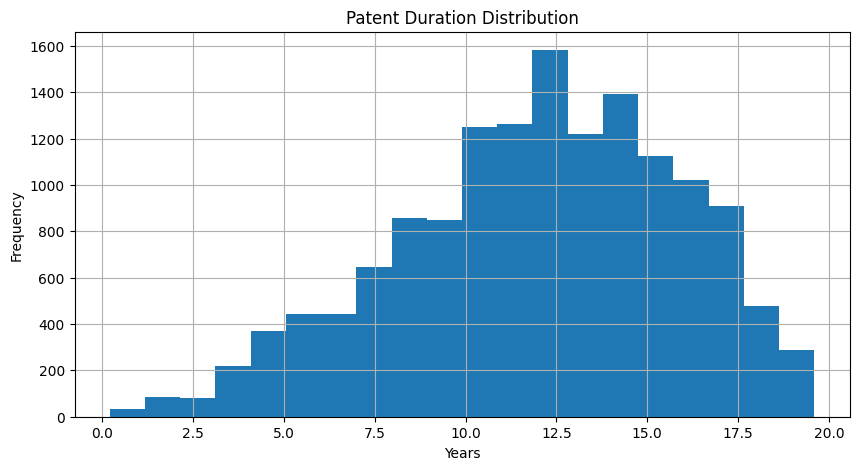

In [35]:
df_pat_tr_num['Patent_Duration_Years'].hist(bins=20, figsize=(10,5)) #we create a histogram to show the distribution of the Patent_Duration_Years column.
plt.title('Patent Duration Distribution') #we set the title of the plot.
plt.ylabel('Frequency') #we set the y label of the plot.
plt.xlabel('Years') #we set the x label of the plot.
plt.show() #we show the plot.

In [36]:
df_pat_tr_num['Patent_Duration_Years'].mode()[0]

13.9

### Analysis of date columns ###

In [37]:
df_pat_tr_date = df_pat_tr[['Submission_Date', 'Expiration_Date']] #we create a new dataframe with application numbers and datetime columns of the original dataframe.
df_pat_tr_date.head() #we display the first rows of the new dataframe.  

,Submission_Date,Expiration_Date
0,NaT,2026-08-24
1,NaT,2027-02-01
2,2013-06-27,2027-04-18
3,NaT,2027-04-18
4,NaT,2027-04-25


,Submission_Date,Count
226,2015-01-06,14
359,2015-01-08,10
1740,2015-01-09,1
1050,2015-01-12,3
201,2015-01-13,16
...,...,...
1675,2024-12-26,1
1815,2025-01-03,1
1302,2025-01-06,2
1150,2025-01-07,3


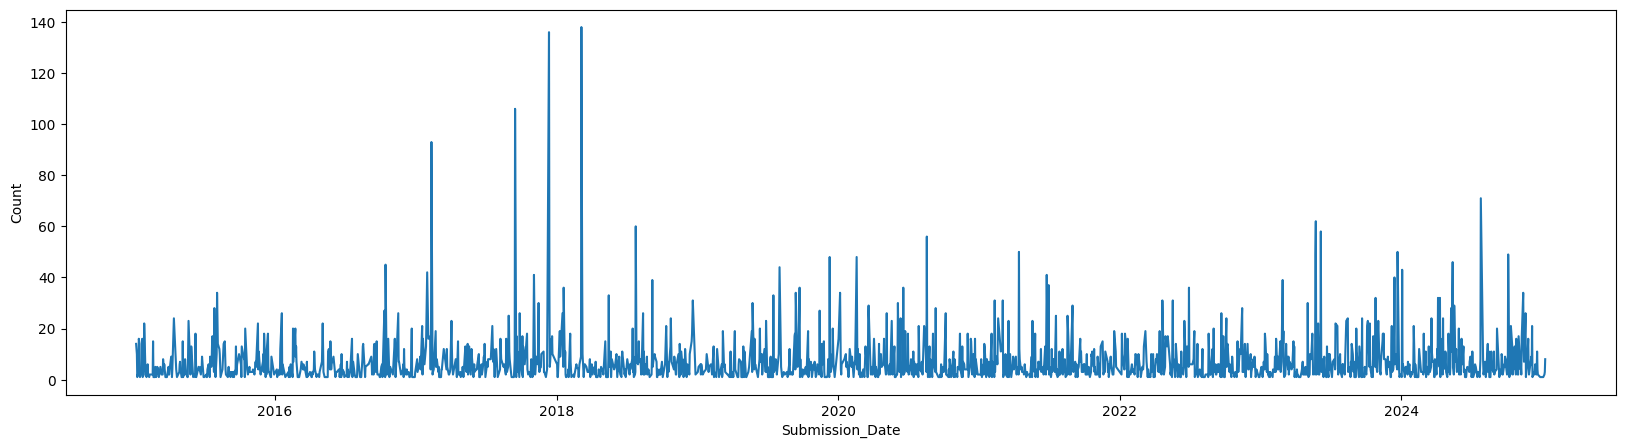

In [38]:
#Univariate analysis of Submission_Date

filtered_patents = df_pat_tr_date.loc[df_pat_tr_date['Submission_Date'] > '2015-01-01'] #we filter the dataframe to only include the rows with Submission_Date > 2015-01-01.

fig, ax = plt.subplots(figsize=(20, 5)) #we create a figure and an axis to plot the data.
df_count = filtered_patents['Submission_Date'].value_counts().reset_index(name='Count').sort_values('Submission_Date') #we create a dataframe with the counts of each date.

display(df_count)

sns.lineplot(data=df_count, x='Submission_Date', y='Count', ax=ax)
plt.show() #we show the plot.

C:\Users\juanj\AppData\Local\Temp\ipykernel_6252\1859339615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat_tr_date['Submission_Month_Year'] = df_pat_tr_date['Submission_Date'].dt.to_period('M') #we create a new column with the month and year of the Submission_Date.


,Submission_Month_Year,Count
115,2015-02,43
113,2015-03,46
91,2015-04,76
81,2015-05,84
102,2015-06,66
...,...,...
77,2024-09,87
7,2024-10,195
14,2024-11,152
93,2024-12,72


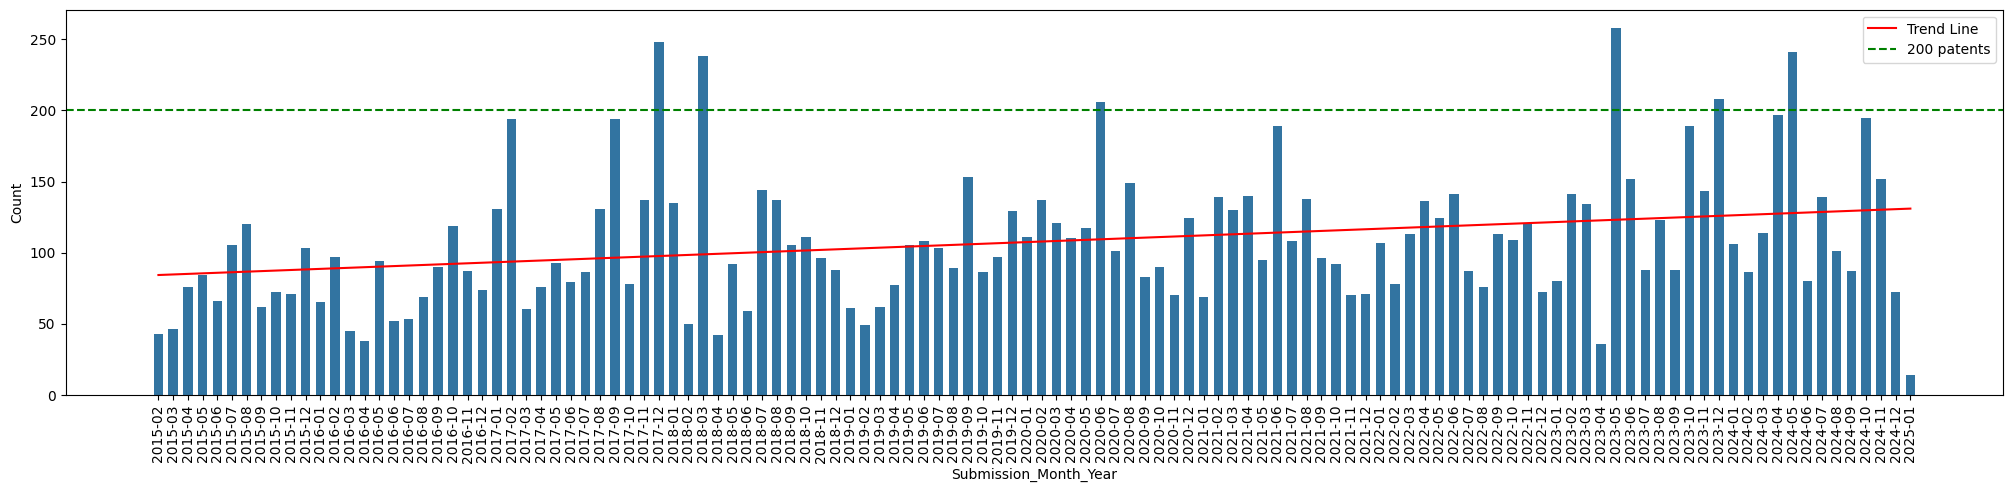

In [39]:
df_pat_tr_date['Submission_Month_Year'] = df_pat_tr_date['Submission_Date'].dt.to_period('M') #we create a new column with the month and year of the Submission_Date.
#df_pat_tr_date.head() #we display the first rows of the new dataframe.

filtered_patents = df_pat_tr_date.loc[df_pat_tr_date['Submission_Month_Year'] > '2015-01'] #we filter the dataframe to only include the rows with Submission_Date > 2015-01.

fig, ax = plt.subplots(figsize=(25, 5)) #we create a figure and an axis to plot the data.
df_count = filtered_patents['Submission_Month_Year'].value_counts().reset_index(name='Count').sort_values('Submission_Month_Year') #we create a dataframe with the counts of each date.
display(df_count) #we display the dataframe with the counts of each date.

sns.barplot(data=df_count, x='Submission_Month_Year', y='Count', ax=ax, gap=.2) #we create a line plot to show the counts of each date.

# Add a numeric index for trend calculation
df_count['Numeric_Index'] = range(len(df_count))

slope, intercept, r_value, p_value, std_err = linregress(df_count['Numeric_Index'], df_count['Count']) #we calculate the slope and intercept of the line.

ax.plot(df_count['Numeric_Index'], intercept + slope * df_count['Numeric_Index'], color="red", label="Trend Line") #we plot the trend line.
ax.axhline(y=200, color='green', linestyle='--', label="200 patents") #we plot a horizontal line at y=200.
plt.legend() #we add a legend to the plot.
plt.xticks(rotation=90) #we rotate the x ticks to make them more readable.
plt.show() #we show the plot.

In [40]:
df_pat_tr_date_years= df_pat_tr_date.dropna()
df_pat_tr_date_years['Submission_Year'] = df_pat_tr_date_years['Submission_Date'].dt.year #we create a new column with the year of the Submission_Date.
df_pat_tr_date_years.head() #we create a new dataframe with the original dataframe.

C:\Users\juanj\AppData\Local\Temp\ipykernel_6252\2437685512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat_tr_date_years['Submission_Year'] = df_pat_tr_date_years['Submission_Date'].dt.year #we create a new column with the year of the Submission_Date.


,Submission_Date,Expiration_Date,Submission_Month_Year,Submission_Year
2,2013-06-27,2027-04-18,2013-06,2013
5,2013-05-01,2029-06-30,2013-05,2013
10,2011-09-23,2027-05-24,2011-09,2011
11,2013-03-18,2024-05-28,2013-03,2013
12,2013-03-28,2025-08-24,2013-03,2013


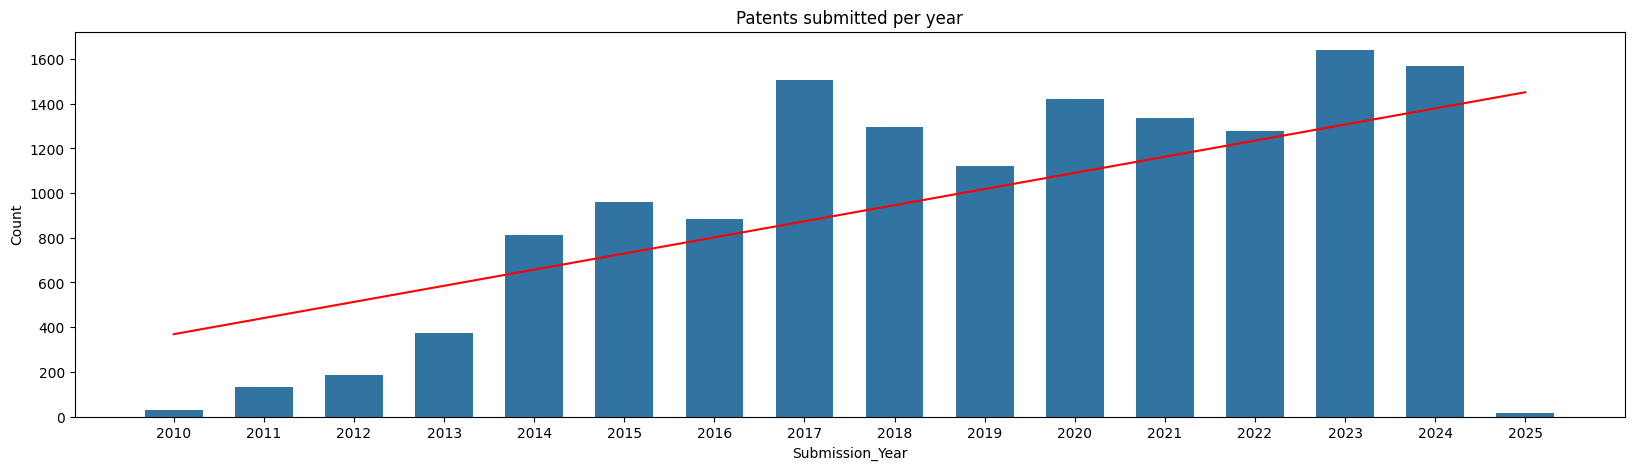

In [41]:
fig, ax = plt.subplots(figsize=(20, 5)) #we create a figure and an axis to plot the data.
df_count = df_pat_tr_date_years['Submission_Year'].value_counts().reset_index(name='Count').sort_values('Submission_Year') #we create a dataframe with the counts of each year.
sns.barplot(data=df_count, x='Submission_Year', y='Count', ax=ax, gap=.2) #we create a bar plot to show the counts of each year.
df_count['Numeric_Index'] = range(len(df_count)) #we create a numeric index for trend calculation.
slope, intercept, r_value, p_value, std_err = linregress(df_count['Numeric_Index'], df_count['Count']) #we calculate the slope and intercept of the line.
ax.plot(df_count['Numeric_Index'], intercept + slope * df_count['Numeric_Index'], color="red", label="Trend Line") #we plot the trend line.
plt.title('Patents submitted per year') #we set the title of the plot.
plt.show()

C:\Users\juanj\AppData\Local\Temp\ipykernel_6252\1046044499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat_tr_date['Expiration_Month_Year'] = df_pat_tr_date['Expiration_Date'].dt.to_period('M') #we create a new column with the month and year of the Expiration_Date.


,Expiration_Month_Year,Count
82,2024-01,79
81,2024-02,79
91,2024-03,74
50,2024-04,102
56,2024-05,96
...,...,...
230,2043-04,1
204,2043-05,17
104,2043-10,69
232,2044-02,1


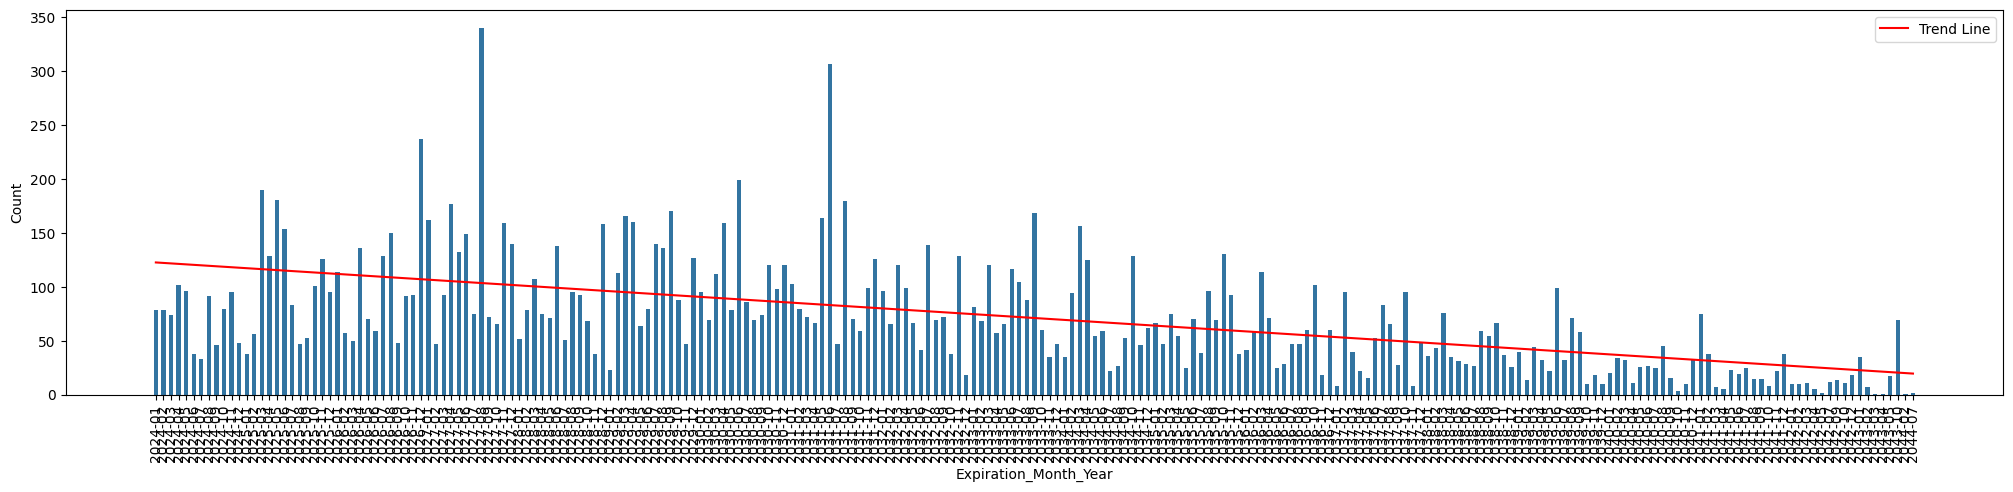

In [42]:
#Univariate analysis of Expiration_Date

df_pat_tr_date['Expiration_Month_Year'] = df_pat_tr_date['Expiration_Date'].dt.to_period('M') #we create a new column with the month and year of the Expiration_Date.
df_pat_tr_date.head() #we display the first rows of the new dataframe.

fig, ax = plt.subplots(figsize=(25, 5)) #we create a figure and an axis to plot the data.
df_count = df_pat_tr_date['Expiration_Month_Year'].value_counts().reset_index(name='Count').sort_values('Expiration_Month_Year') #we create a dataframe with the counts of each date.
display(df_count) #we display the dataframe with the counts of each date.

sns.barplot(data=df_count, x='Expiration_Month_Year', y='Count', ax=ax, gap = .3) #we create a line plot to show the counts of each date.

# Add a numeric index for trend calculation
df_count['Numeric_Index'] = range(len(df_count))

slope, intercept, r_value, p_value, std_err = linregress(df_count['Numeric_Index'], df_count['Count']) #we calculate the slope and intercept of the line.

ax.plot(df_count['Numeric_Index'], intercept + slope * df_count['Numeric_Index'], color='red', label='Trend Line') #we plot the trend line.
plt.legend() #we add a legend to the plot.
plt.xticks(rotation=90) #we rotate the x ticks to make them more readable.
plt.show() #we show the plot.

In [43]:
df_pat_tr_date_years['Expiration_Year'] = df_pat_tr_date_years['Expiration_Date'].dt.year #we create a new column with the year of the Expiration_Date.
df_pat_tr_date_years.head() #we create a new dataframe with the original dataframe.

C:\Users\juanj\AppData\Local\Temp\ipykernel_6252\1365273832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat_tr_date_years['Expiration_Year'] = df_pat_tr_date_years['Expiration_Date'].dt.year #we create a new column with the year of the Expiration_Date.


,Submission_Date,Expiration_Date,Submission_Month_Year,Submission_Year,Expiration_Year
2,2013-06-27,2027-04-18,2013-06,2013,2027
5,2013-05-01,2029-06-30,2013-05,2013,2029
10,2011-09-23,2027-05-24,2011-09,2011,2027
11,2013-03-18,2024-05-28,2013-03,2013,2024
12,2013-03-28,2025-08-24,2013-03,2013,2025


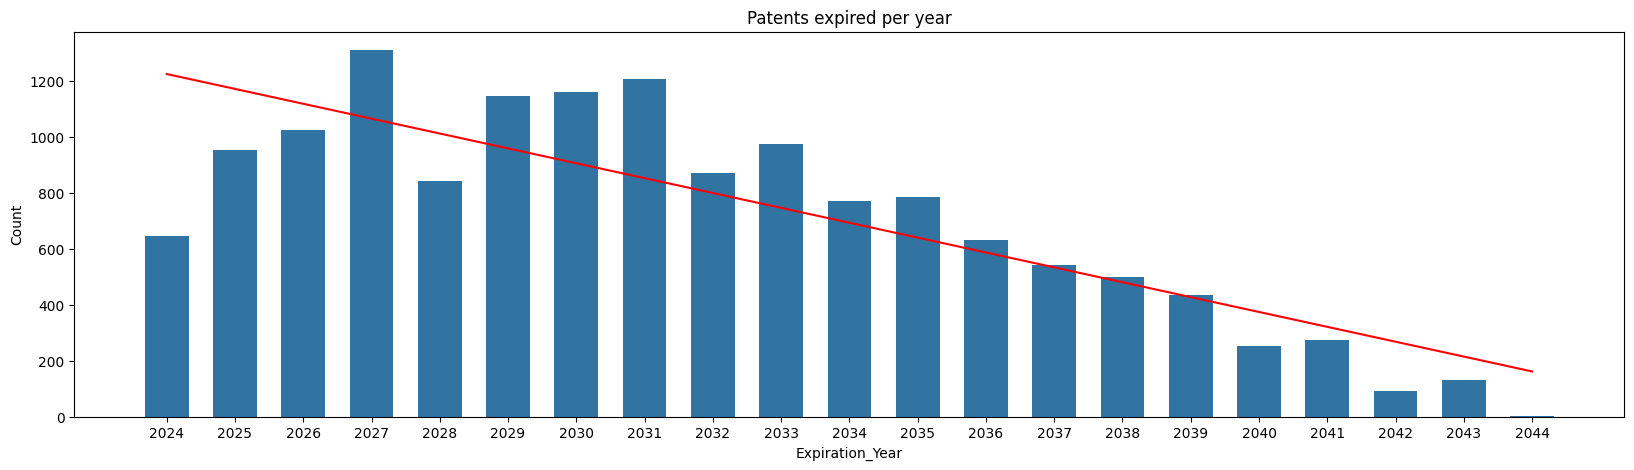

In [44]:
fig, ax = plt.subplots(figsize=(20, 5)) #we create a figure and an axis to plot the data.
df_count = df_pat_tr_date_years['Expiration_Year'].value_counts().reset_index(name='Count').sort_values('Expiration_Year') #we create a dataframe with the counts of each year.
sns.barplot(data=df_count, x='Expiration_Year', y='Count', ax=ax, gap=.2) #we create a bar plot to show the counts of each year.
df_count['Numeric_Index'] = range(len(df_count)) #we create a numeric index for trend calculation.
slope, intercept, r_value, p_value, std_err = linregress(df_count['Numeric_Index'], df_count['Count']) #we calculate the slope and intercept of the line.
ax.plot(df_count['Numeric_Index'], intercept + slope * df_count['Numeric_Index'], color="red", label="Trend Line") #we plot the trend line.
plt.title('Patents expired per year') #we set the title of the plot.
plt.show()

In [50]:
df_pat_tr.sort_values(by='Appl_No').head(20)

,Appl_No,Product_No,Appl_Type,Delist_Flag,Patent_Use,Submission_Date,Expiration_Date,Patent_Duration_Years
1889,13217,3,Innovator,Not Requested,TREATMENT OF MUSCULOSKELETAL CONDITIONS,NaT,2026-02-06,NaN
14403,18207,4,Innovator,Not Requested,No Code,2015-07-20,2029-03-13,13.6
13494,18207,2,Innovator,Not Requested,No Code,2015-07-20,2029-03-13,13.6
13592,18207,1,Innovator,Not Requested,No Code,2015-07-20,2029-03-13,13.6
10228,18207,3,Innovator,Not Requested,No Code,2015-07-20,2029-03-13,13.6
12696,18612,2,Innovator,Not Requested,No Code,2013-01-03,2028-04-30,15.3
1,18613,1,Innovator,Not Requested,TREATMENT OF PATIENTS INFECTED WITH PEDICULUS ...,NaT,2027-02-01,NaN
14439,18613,1,Innovator,Not Requested,No Code,2011-08-08,2026-08-14,15.0
2765,18705,2,Innovator,Not Requested,METHOD OF TREATING ANGINA PECTORIS,2012-04-11,2029-03-12,16.9
1890,18708,1,Innovator,Not Requested,METHOD FOR TREATING INSOMNIA WHILE REDUCING TH...,NaT,2028-06-03,NaN
